In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ANIKET\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ANIKET\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Cleaning

In [7]:
# Loading the dataset

data=pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Handling Missing Values

#We can handle missing values in several ways:
#For Age, we can fill missing values with the median age.
#For Embarked, we can fill missing values with the most common port of embarkation ('S').
#We can drop the Cabin column due to excessive missing values.

#fill missing value:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

#drop cabin column:
data.drop(columns=['Cabin'], inplace=True)

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_26036\635176478.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\ANIKET\AppData\Local\Temp\ipykernel_26036\635176478.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [10]:
# Encoding Categorical Variables
#We need to convert categorical variables into numerical format for analysis.

#convert 'Sex' into numerical format:
data['Sex']=data['Sex'].map({'male':0, 'female':1})

#convert 'Embarked' into numerical format using one-hot encoding
data=pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Exploratory Data Analysis(EDA)

In [29]:
# Descriptive statistics
#We can start by looking at descriptive statitics of the dataset.

#diaplay descriptive statitics:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# Display the column names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [31]:
# Survival Rate Analysis
#Let's analyze the overall survival rate.

#calculate survival rate
survived_rate=data['Survived'].mean()*100
print(f'overall survived rate: {survived_rate:.2f}%')

overall survived rate: 38.38%


In [32]:
# Analyzing Survival by Gender
#We can analyze how gender affected survival rates.

#survived rate by gender:
survived_by_gender=data.groupby('Sex')['Survived'].mean() * 100
print(survived_by_gender)

Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


In [33]:
# Analyzing Survival by Passenger Class (Pclass)
#Next, we analyze survival rates based on passenger class.

#survived rate by passenger class
survived_by_class=data.groupby('Pclass')['Survived'].mean() * 100
print(survived_by_class)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


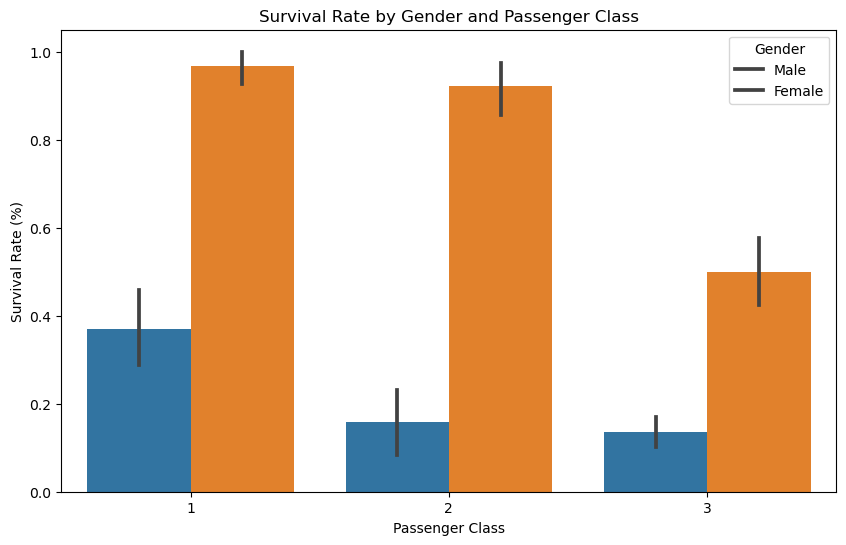

In [41]:
# Visualizing Relationships 
#Survival rate by gender and class

#set up the matplotlib figure:
plt.figure(figsize=(10,6))

#create a bar plot for survived rate by gender and class:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival Rate by Gender and Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

In [52]:
pip install --upgrade pandas seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.7.0 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.


In [51]:
import pandas as pd
import seaborn as sns

print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.2
Seaborn version: 0.11.2


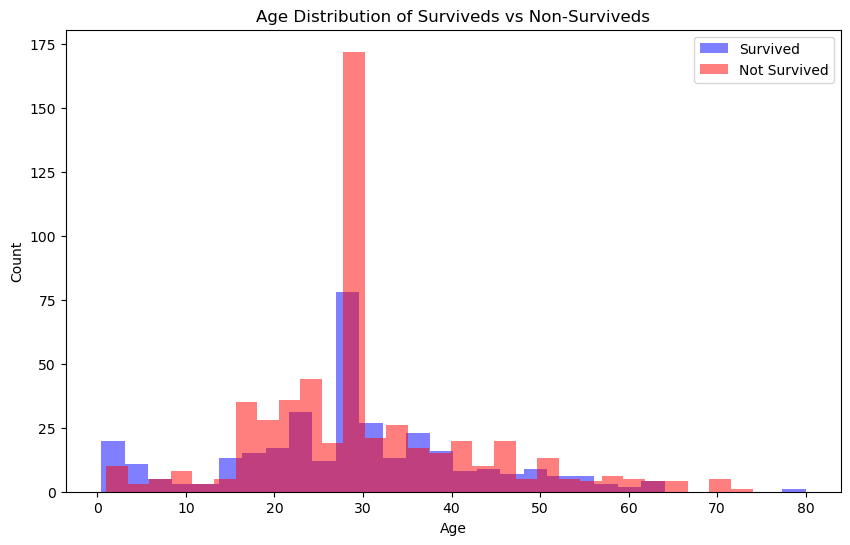

In [54]:
#create a histogram for age distribution of survivors vs non-survivors using Matplotlib:
plt.figure(figsize=(10, 6))

#plot for survivors:
plt.hist(data[data['Survived'] == 1]['Age'].dropna(), 
         bins=30, alpha=0.5, label='Survived', color='blue')

# Plot for non-survivors
plt.hist(data[data['Survived'] == 0]['Age'].dropna(), 
         bins=30, alpha=0.5, label='Not Survived', color='red')

plt.title('Age Distribution of Surviveds vs Non-Surviveds')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()